🔁 Frecuencia dominante: 2.47 Hz
⏱️  Período: 0.405 s


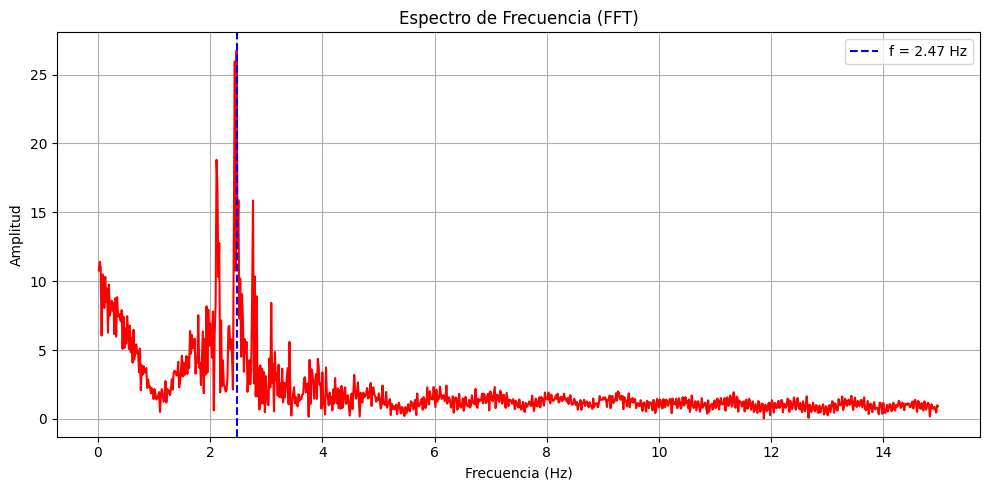

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Leer CSV
df = pd.read_csv("trayectoria_punto_rojo.csv")

# Elegir señal a analizar ('x' o 'y')
tiempo = df["tiempo_s"].values
senal = df["x"].values  # Cambiar a 'y' si querés analizar esa dirección

# Eliminar posibles NaN
valid = ~np.isnan(senal)
tiempo = tiempo[valid]
senal = senal[valid]

# Parámetros de muestreo
T = tiempo[1] - tiempo[0]
Fs = 1 / T
N = len(senal)

# FFT
yf = fft(senal)
xf = fftfreq(N, T)

# Filtrar solo frecuencias positivas mayores que cero
xf_pos = xf[:N//2]
yf_pos = 2.0/N * np.abs(yf[:N//2])

# Remover la frecuencia cero
xf_pos = xf_pos[1:]
yf_pos = yf_pos[1:]

# Encontrar frecuencia dominante
idx_max = np.argmax(yf_pos)
frecuencia_dominante = xf_pos[idx_max]

print(f"🔁 Frecuencia dominante: {frecuencia_dominante:.2f} Hz")
print(f"⏱️  Período: {1/frecuencia_dominante:.3f} s")

# Graficar espectro
plt.figure(figsize=(10, 5))
plt.plot(xf_pos, yf_pos, 'r')
plt.title("Espectro de Frecuencia (FFT)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.axvline(frecuencia_dominante, color='blue', linestyle='--', label=f"f = {frecuencia_dominante:.2f} Hz")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()